## This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [56]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [339]:
df=pd.read_csv('simple_well2.csv')
dfnoise=pd.read_csv('simple_well_noise2.csv')

In [58]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/20,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1/2/20,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1/3/20,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1/4/20,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1/5/20,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [59]:
df.drop(columns='Date', inplace=True)

In [340]:
dfnoise.drop(columns='Date', inplace=True)

In [60]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [61]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [62]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [341]:
dfnoise2=pd.get_dummies(dfnoise['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [63]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [64]:
df=pd.concat([df,df2],axis=1)

In [342]:
dfnoise=pd.concat([dfnoise,dfnoise2],axis=1)

In [65]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [343]:
dfnoise.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [66]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,2175.632949,212.158344,0,1
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,2187.198066,210.639192,0,1
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,2197.358736,209.096588,0,1
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,2206.134095,207.534762,0,1
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,2213.688390,205.957465,0,1


In [344]:
dfnoise.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,1.790,460.6,4442.671236,5619.8,0.067393,0.815464,0.863508,393767.4799,0.436240,2.598810,0.013495,0.273391,2094.523435,212.485131,0,1
1,1.919,428.6,3934.486042,5573.4,0.079603,0.727930,0.828648,365537.3796,0.509040,2.312944,0.013169,0.275207,2155.245948,210.626423,0,1
2,1.949,438.9,3568.119221,5508.8,0.081076,0.673751,0.815093,341473.5624,0.518934,2.141275,0.013095,0.276239,2158.477301,209.190858,0,1
3,2.099,404.6,3202.437317,5474.9,0.094907,0.607158,0.774534,324227.9367,0.598238,1.922288,0.012710,0.278259,2237.041147,207.249830,0,1
4,2.089,408.6,2948.977411,5413.7,0.094338,0.568503,0.764159,306026.6755,0.596594,1.801383,0.012720,0.279284,2228.039648,205.905632,0,1


In [67]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [68]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [69]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

In [345]:
y_noisepre=dfnoise['FINAPRESS']
X_noisepre=dfnoise.drop(columns=['FINAPRESS','FINATEMP'], axis=1)
y_noisehol=dfnoise['HoldupFractionLiquid6']
X_noisehol=dfnoise.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)
y_noisepat=dfnoise[['FlowPattern_3','FlowPattern_4']]
X_noisepat=dfnoise.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)


### Plot the data

In [90]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labelb)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

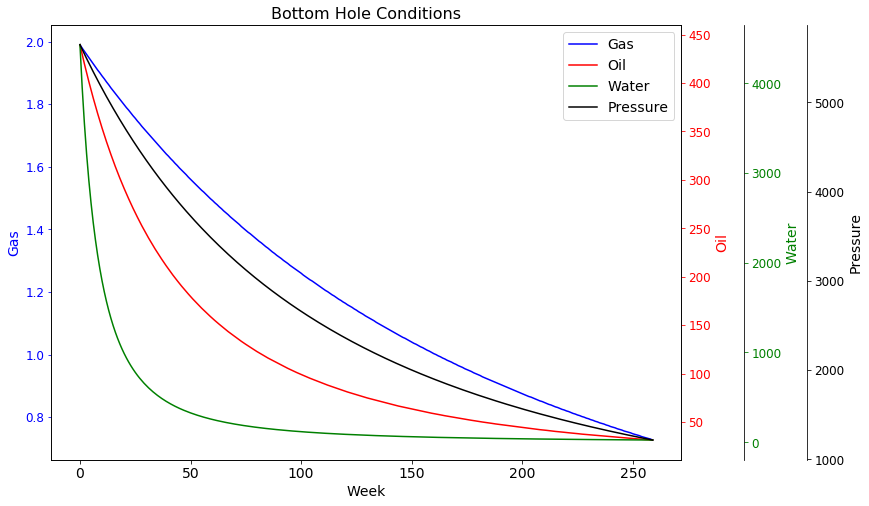

In [91]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
            df['Oil_bpd'], "Oil", 
            df['Water_bpd'],"Water",
            df['FWHP_psig'], "Pressure",
            "Week",
            "Bottom Hole Conditions")

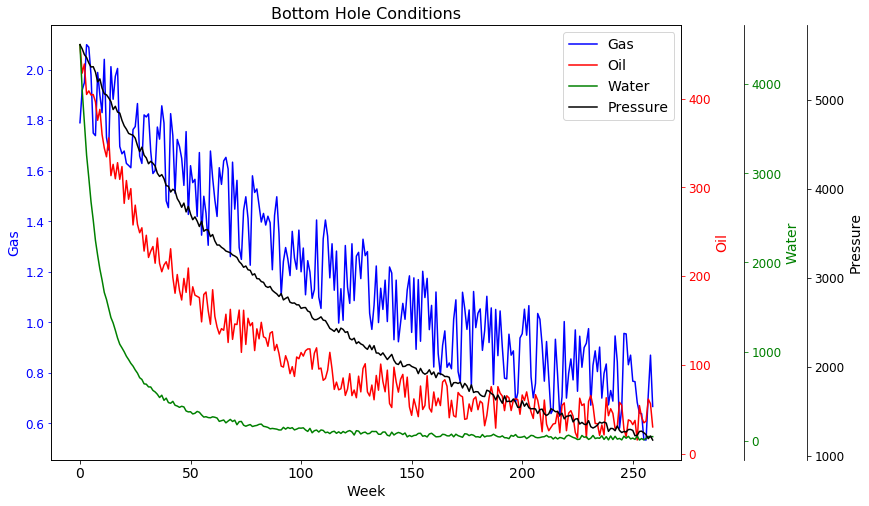

In [346]:
four_y_plot(dfnoise['Gas Flow_MMSCFD'], "Gas",
            dfnoise['Oil_bpd'], "Oil", 
            dfnoise['Water_bpd'],"Water",
            dfnoise['FWHP_psig'], "Pressure",
            "Week",
            "Bottom Hole Conditions")

Prepare train and test data

In [72]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]
X_hol= preprocessing.StandardScaler().fit(X_hol).transform(X_hol)
X_hol[0:5]

array([[ 2.23970334,  3.42406948,  6.58216053,  2.56736951, -0.91667945,
         6.08774454,  5.96778178, -1.1171822 ,  6.10578084, -0.97945762,
        -1.55850943,  1.62196475, -2.1015867 ,  2.1015867 ],
       [ 2.20859484,  3.31882994,  5.82415528,  2.52325256, -0.67955852,
         5.44879228,  5.34489299, -1.1025325 ,  5.46206381, -0.9953094 ,
        -1.55156806,  1.6381069 , -2.1015867 ,  2.1015867 ],
       [ 2.18031439,  3.21674759,  5.18549869,  2.47980915, -0.45787437,
         4.90702618,  4.8188104 , -1.08880367,  4.91641874, -1.01042225,
        -1.54448407,  1.65228878, -2.1015867 ,  2.1015867 ],
       [ 2.15203393,  3.11887482,  4.64205021,  2.43695509, -0.25349493,
         4.44305372,  4.36990303, -1.07608214,  4.44929304, -1.02469809,
        -1.53727698,  1.6645371 , -2.1015867 ,  2.1015867 ],
       [ 2.12375347,  3.02415924,  4.17552442,  2.39469038, -0.06353338,
         4.04215813,  3.98351463, -1.06420598,  4.04579491, -1.03825211,
        -1.52996661,  1.67

In [347]:
X_noisepre= preprocessing.StandardScaler().fit(X_noisepre).transform(X_noisepre)

X_noisehol= preprocessing.StandardScaler().fit(X_noisehol).transform(X_noisehol)

In [73]:
X_train0=X_pre[0:182]
y_train0=y_pre[0:182]
X_test0=X_pre[182:]
y_test0=y_pre[182:]
# hold up data
X_hol_train0=X_hol[0:182]
y_hol_train0=y_hol[0:182]
X_hol_test0=X_hol[182:]
y_hol_test0=y_hol[182:]

In [348]:
X_noisetrain0=X_noisepre[0:182]
y_noisetrain0=y_noisepre[0:182]
X_noisetest0=X_noisepre[182:]
y_noisetest0=y_noisepre[182:]
# hold up data
X_hol_noisetrain0=X_noisehol[0:182]
y_hol_noisetrain0=y_noisehol[0:182]
X_hol_noisetest0=X_noisehol[182:]
y_hol_noisetest0=y_noisehol[182:]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (172, 14) (172,)
Test set: (10, 14) (10,)


10

### *SVM*

In [75]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



In [229]:

svr_rbf = svm.SVR(kernel='rbf', C=3000, gamma=0.0019, epsilon=0.1)
svr_lin = svm.SVR(kernel='linear', C=52, gamma=0.1, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=1, degree=3, epsilon=.1,
               coef0=2.1)

clf=svr_lin.fit(X_train, y_train)
print(clf.score(X_test0,y_test0))
y_hat=svr_lin.predict(X_test0)

# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

0.9957277628332906


In [84]:
def cross_valuations(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print("SVR", svr_.kernel,labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    
   

Evaluate different algorithms

In [231]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -3.0306 1.0940
SVR rbf RMSE: -4.6216 1.8650
SVR rbf R^2: 0.9999 0.0001


SVR linear MAE: -3.3257 1.1908
SVR linear RMSE: -5.6133 2.4541
SVR linear R^2: 0.9999 0.0001


SVR poly MAE: -0.6349 0.1565
SVR poly RMSE: -0.8813 0.2341
SVR poly R^2: 1.0000 0.0000




In [337]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
    for ix, svr in enumerate(svrs):
        y_hat=svr.fit(trainx, trainy).predict(testx)
        
        MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
        MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
        R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
        axes[ix].plot(y_hat, color=model_color[ix], lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(kernel_label[ix], MAE, R2))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=False, shadow=False, fontsize=14)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

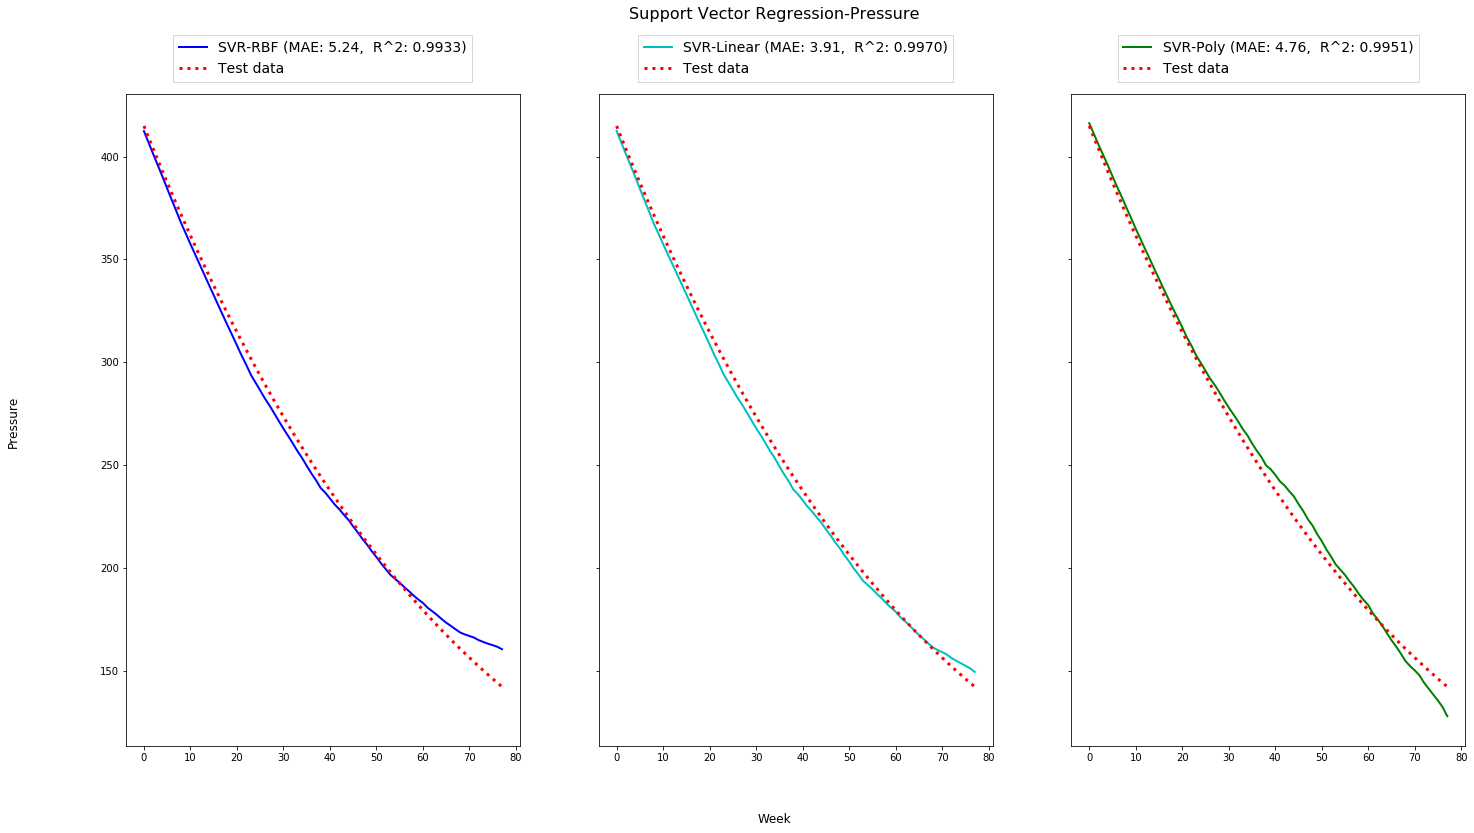

In [230]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_train0,
               y_train0,
               X_test0,
               y_test0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

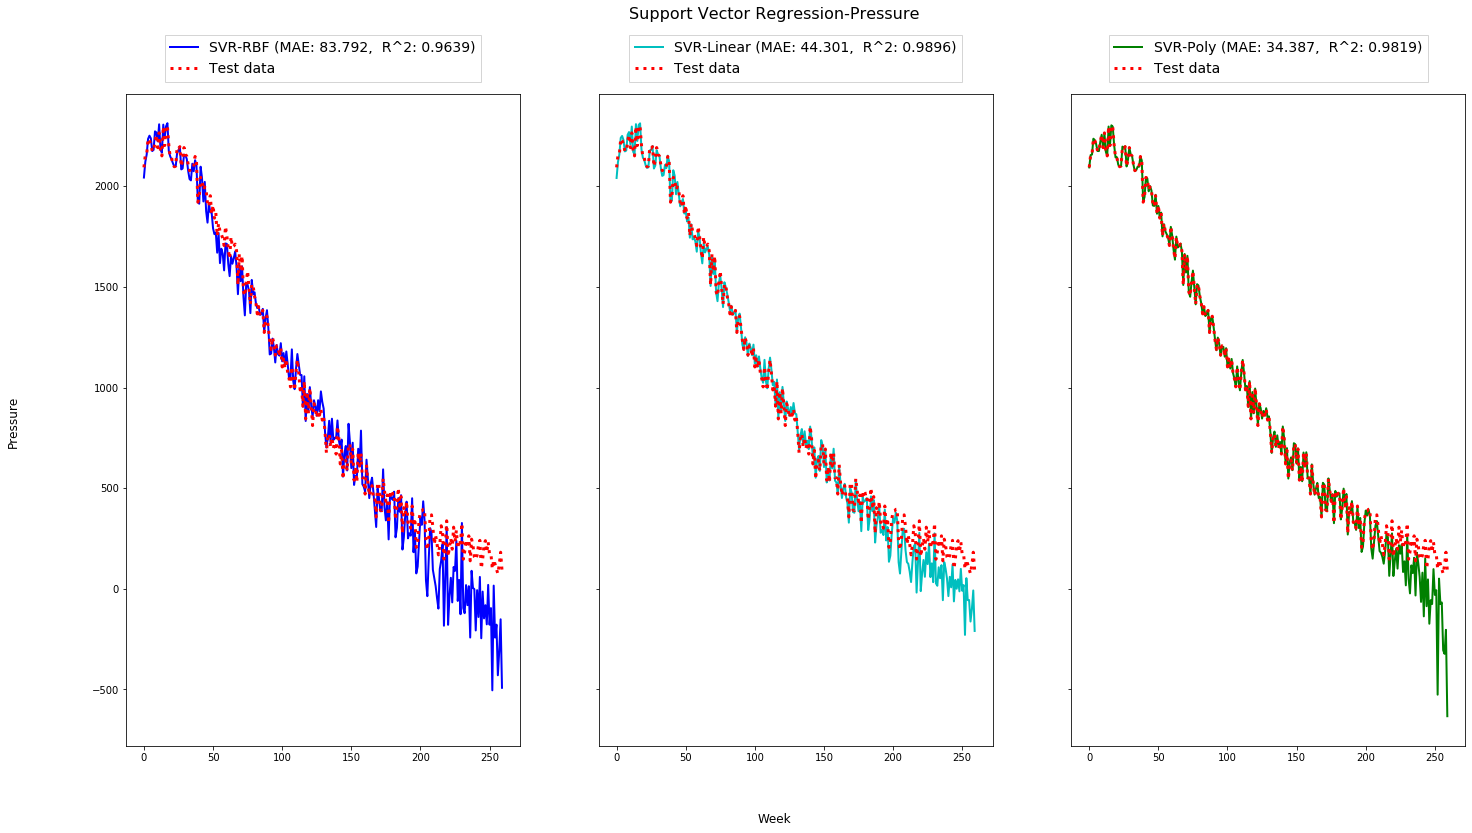

In [350]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_noisetrain0,
               y_noisetrain0,
               X_noisepre,
               y_noisepre,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

Predict Holdup

In [335]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=0.2, gamma=0.005, epsilon=0.0001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=3, epsilon=.0001,
               coef0=0.6)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_train0,
                 y_hol_train0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0029 0.0011
SVR rbf RMSE: -0.0059 0.0022
SVR rbf R^2: 0.9936 0.0111


SVR linear MAE: -0.0021 0.0007
SVR linear RMSE: -0.0041 0.0017
SVR linear R^2: 0.9965 0.0067


SVR poly MAE: -0.0003 0.0001
SVR poly RMSE: -0.0005 0.0002
SVR poly R^2: 1.0000 0.0001




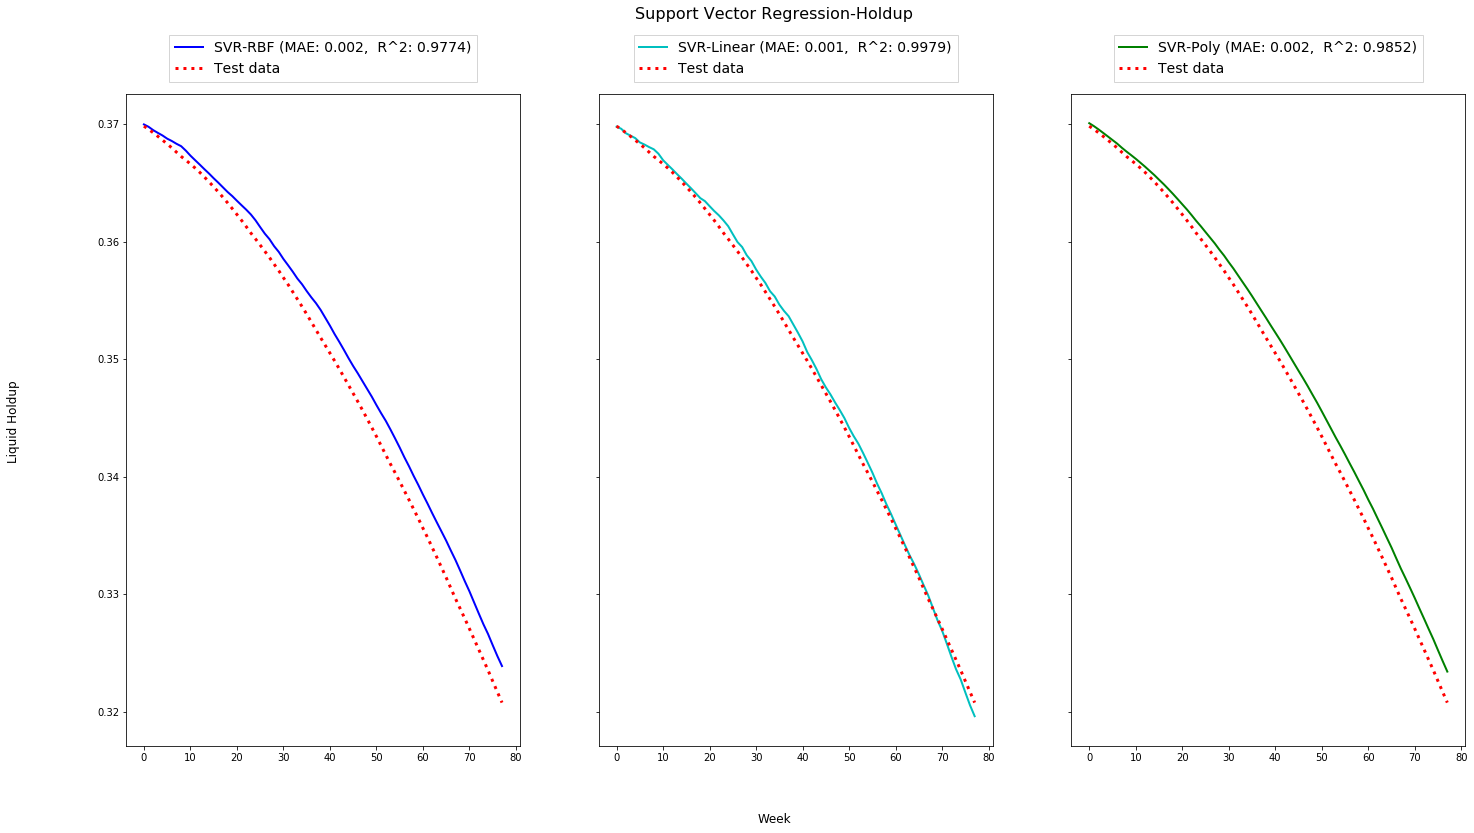

In [338]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_train0,
               y_hol_train0,
               X_hol_test0,
               y_hol_test0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

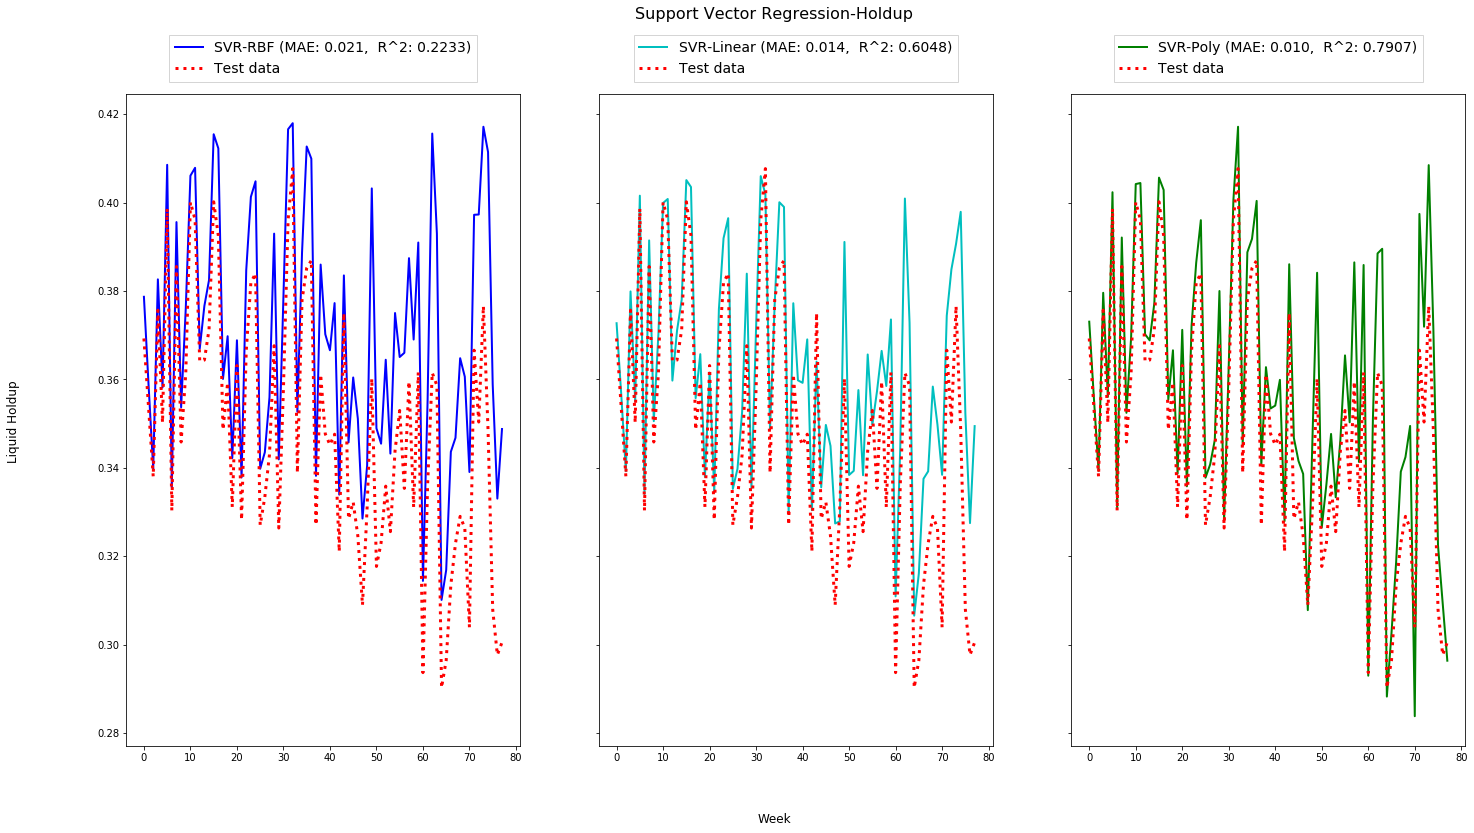

In [353]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_noisetrain0,
               y_hol_noisetrain0,
               X_hol_noisetest0,
               y_hol_noisetest0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")